-----------------------------------  ----------
Nominal bending stress               5.702MPa
Assumed stress concentration factor  3
Max principal stress                 17.106 MPa
Safety factor                        3.741
-----------------------------------  ----------


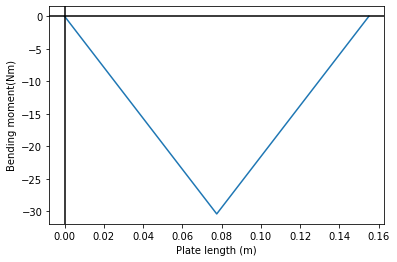

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
def stressCalc(w,l,b,h):#(weight of average person, length, thickness, height)
    ys=64 # yield strength of acrylic
    scf=3   #stress concentration factor: a conservatively estimated value of 3 
    #is chosen to account for the presence of holes for the support and battery plate
    I=(b)*((h)**3)/12  # Second moment of area
    Mmax=-w/2*(l/2) # Maximum bending moment along the beam
    x=np.array([0,l/2,l]) #significant points on the beam
    y=np.array([0,Mmax,0]) # corresponing BM
    plt.plot(x,y)
    plt.xlabel('Plate length (m)')
    plt.ylabel('Bending moment(Nm)')
    plt.axvline(0,color='black')
    plt.axhline(0,color='black')
    Nsigma=Mmax*(-h/2)/(I*(10**6))  #calculate nominal maximum stress using sigma=My/I
    sigma=Nsigma*scf #actual stress using assumed stress concentration value
    sf=ys/sigma # safety factor against yielding is yield strength/max stress
    #tabulating key values
    data = [
    ['Nominal bending stress',str(round(Nsigma,3))+'MPa'],
    ['Assumed stress concentration factor',scf],
    ['Max principal stress',str(round(sigma,3))+' MPa'],
    ['Safety factor',round(sf,3)]]
    print(tabulate(data))
stressCalc(80*9.81,0.155,0.005,0.08)